<a href="https://colab.research.google.com/github/juangross/cursoPDI2021/blob/main/PDI_TP8_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Implementar un aplicativo que permita abrir una imagen y con esta obtener:


• Downsampling X2 (mostrando la imagen resultado al doble de tamaño para comparar el efecto) utilizando kernel constante, bilineal, y bicúbico.


• Upsampling X2 (mostrando la imagen original al doble de tamaño para comparar el efecto) utilizando kernel constante, bilineal, y bicúbico.


• Cuantización a cantidad de niveles de gris variable, utilizando uniforme, dithering aleatorio, y difusión del error por scan-line.
Todas las funciones de Downsamplig, Upsampling y Cuantización deben ser desarrolladas como funciones propias y NO con funciones de biblioteca. Les sugiero recorrer la imagen mediante ciclos for anidados para una fácil implementación.
Fecha de entrega: 08 de Dicembre. 

bloque 1 - descarga de imágenes

In [ ]:
#importo material de trabajo
!git clone https://github.com/juangross/cursoPDI2021

Cloning into 'cursoPDI2021'...
remote: Enumerating objects: 264, done.
remote: Counting objects: 100% (264/264), done.
remote: Compressing objects: 100% (262/262), done.
remote: Total 264 (delta 80), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (264/264), 41.03 MiB | 9.93 MiB/s, done.
Resolving deltas: 100% (80/80), done.


In [ ]:
#@title
import matplotlib.pyplot as plt
import imageio as img
import numpy as np
from scipy import fftpack
import fnmatch
import os


#transformo a 
def RGB_TO_YIQ(RGBImage ):
  #matriz de conversión de RGB -> YIQ
  RGB2YIQ=np.array([[0.299,0.587,0.114],
                    [0.595716,-0.274453,-0.321263],
                    [0.211456,-0.522591,0.311135]], dtype=float)

  #me baso en esta explicación del producto matricial para hacer la conversión de bases
  #https://stackoverflow.com/questions/46990838/numpy-transforming-rgb-image-to-yiq-color-space
  YIQ_image=np.zeros(RGBImage.shape, dtype=float)
  YIQ_image=np.dot(RGBImage,RGB2YIQ.T.copy())
  return YIQ_image


def leerIMG(archivo):
  
  #Lee imagen con el formato actual
  imagen=(img.imread(f"{path}{archivo}.{ext}"))      #lee con imageio

  #imagen=imagen.astype('float')/255 #normalizo
  #imagen=np.clip(imagen,0.,1.)  #recorto los valores extremos al rango [0:1] 
  print("leyendo archivo:", f"{path}{archi}.{ext}", imagen.shape)
  #plt.imshow( imagen)

  #print("valor máximo: ",np.max(imagen))
  return  imagen



IndentationError: ignored

bloque 3 - cargo imagen.

iamgenes en grayscale= devuelve la imagen


imagen RGB: convierto q YIQ y devuelve sólo el canal Y

leyendo archivo: ./cursoPDI2021/imagenes/chip3-gray.png (450, 695)
Archivo, dimension:  chip3-gray (450, 695)
valor máximo:  255


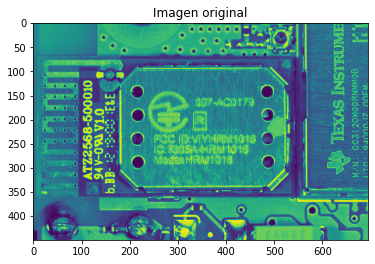

In [ ]:
import imageio as img
path="./cursoPDI2021/imagenes/"
ext="png"

#Procurar buscar imágenes que tengan el mismo tamaño
archi = "chip3-gray" #@param [ 'last','Philips_PM5544.svg320','Philips_PM5544.svg640', '320px-RCA_Indian_Head_Test_Pattern.svg320', '640px-RCA_Indian_Head_Test_Pattern.svg','chip1r','chip2','chip3-gray', 'plantaciones1', 'mac_atrofica','mac_subatr']

imagen=leerIMG(archi)

print("Archivo, dimension: ", archi, imagen.shape)

if (len(imagen.shape) >2):
  #la imagen tiene mas de 1 canal.
  #img2=imagen.astype('float')//255 #normalizo
  #img3=np.clip(img2,0.,1.)  #recorto los valores extremos al rango [0:1] 

  imagen_yiq=RGB_TO_YIQ(imagen)
  #print("Canales: ", imagen_yiq.shape)
  img=imagen_yiq[:,:,0]

else:
  #tiene un sólo canal
  img=imagen

print("valor máximo: ",np.max(img))
plt.title("Imagen original")
plt.imshow( imagen.astype('uint8') )





```
# E`sto tiene formato de código`
```

bloque 4 - procesamiento Downscale

downscale(imagen):  (450, 695)
Lienzo:  (225, 348)


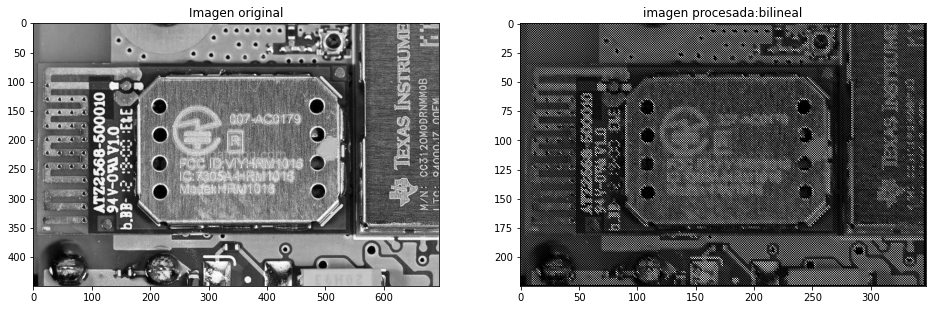

In [ ]:
def downscale(img, tipo= "constante"):
  tam= img.shape
  print("downscale(imagen): ", tam)
  
  
  ajustex=tam[0]%2
  ajustey=tam[1]%2
  lienzox=tam[0]//2+ajustex
  lienzoy=tam[1]//2+ajustey
  #print("tamaño lienzo:", (tam[0]//2+ajustex) ,(tam[1]//2+ajustey))
  #defino lienzo en blanco cuyo tamaño es la mitad que el de la imagen.
  lienzo=np.zeros((lienzox,lienzoy),dtype=img.dtype)
  print("Lienzo: ", lienzo.shape)

  if tipo=='constante':
    for i in range(0,lienzox):
      for j in range(0,lienzoy):
#       el escalado es simplemente copiar en el lienzo
#        1 pixel de cada 2 pixels de la imagen original
        lienzo[i,j]=img[i*2,j*2]

  elif tipo=='promedio':
#   hago el reescalado tomando un kernel de 2x2 y calculo el promedio.
#   el valor del promedio es el valor resultado escalado
#promedio entre las 4 muestra
#usando un slice de la imagen
    kernel=0.25* np.array([[1,1],
                      [1,1]])
    kx=kernel.shape[0] #ancho del kernel
    ky=kernel.shape[0] #alto del kernel

    for i in range(0,lienzox):
      for j in range(0,lienzoy):
        ven= img[i*2:i*2+kx,j*2:j*2+ky]
        lienzo[i,j]=np.mean(ven)
#       calculo manusl
#        lienzo[i,j]=.25*(img[i*2,j*2]+
#                         img[i*2+1,j*2]+
#                         img[i*2,j*2+1]+
#                         img[i*2+1,j*2+1])
  elif tipo=='bilineal':
    #se puede hacer sin el kernel y ventana, pero lo dejo así por legibilidad
    kernel=np.array([[1,1],
                      [1,1]])
    kx=kernel.shape[0] #ancho del kernel
    ky=kernel.shape[0] #alto del kernel
    for i in range(0,lienzox-kx,kx):
      for j in range(0,lienzoy-ky,ky):
        lienzo[i,j]=img[i*2,j*2]
        ven= img[i*2:i*2+kx,j*2:j*2]
        lienzo[i+1,j]=0.5*np.sum(ven)
        #lienzo[i+1,j]=(img[i*2,j*2]+img[i*2+1,j*2])//2 #promedio de la fila
        ven= img[i*2:i*2,j*2:j*2+ky]
        lienzo[i,j+1]=0.5*np.sum(ven)
        #lienzo[i,j+1]=(img[i*2,j*2]+img[i*2,j*2+1])//2 #promedio de la columna
        ven= img[i*2:i*2+kx,j*2:j*2+ky]
        lienzo[i+1,j+1]= 0.25* np.sum(ven) #promedio de la ventana

  elif tipo=='bicubica':
    kernel=0.25* np.array([[1,1,1,1],
                          [1,1,1,1],
                          [1,1,1,1],
                          [1,1,1,1]])
    pad=np.zeros(img.shape[1])
    aux=img
    for i in range(kx,img.shape[0]-kx,1):
        for j in range(ky, img.shape[1]-ky,1):
              ven=img[i-kx:i+kx-1,    j-ky:j+ky-1]
              lienzo[i,j]=np.sum(np.multiply(ven, kernel ))

  return lienzo


tipo = "bilineal" #@param [ 'constante', 'lineal', 'bilineal','promedio']
res=downscale(img, tipo)  


fig, axs = plt.subplots(1, 2, tight_layout=False,figsize=(16,16))
axs[0].imshow(img.astype('uint8'),cmap= 'gray')
axs[0].set_title("Imagen original")
axs[1].imshow( res.astype('uint8'),cmap='gray')
axs[1].set_title("imagen procesada:%s" % str(tipo))
plt.show()

#genero archivo para poder reutilizarlo luego
archi='last'
img.imwrite(f"{path}{archi}.{ext}",res.astype('uint8'), format="PNG-PIL")


Upscale



bloque 3 - cargo imagen.

iamgenes en grayscale= devuelve la imagen


imagen RGB: convierto q YIQ y devuelve sólo el canal Y

leyendo archivo: ./cursoPDI2021/imagenes/chip2.png (450, 573, 3)
Archivo, dimension:  chip2 (450, 573, 3)
valor máximo:  254.99999999999997


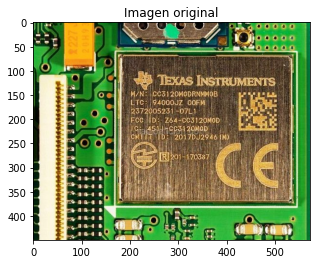

In [ ]:
import imageio as img

path="./cursoPDI2021/imagenes/"
ext="png"

#Procurar buscar imágenes que tengan el mismo tamaño
archi = "chip2" #@param [ 'last','Philips_PM5544.svg320','Philips_PM5544.svg640', '320px-RCA_Indian_Head_Test_Pattern.svg320', '640px-RCA_Indian_Head_Test_Pattern.svg','chip1r','chip2','chip3-gray', 'plantaciones1', 'mac_atrofica','mac_subatr']

imagen=leerIMG(archi)

print("Archivo, dimension: ", archi, imagen.shape)

if (len(imagen.shape) >2):
  #la imagen tiene mas de 1 canal.
  #img2=imagen.astype('float')//255 #normalizo
  #img3=np.clip(img2,0.,1.)  #recorto los valores extremos al rango [0:1] 

  imagen_yiq=RGB_TO_YIQ(imagen)
  #print("Canales: ", imagen_yiq.shape)
  img=imagen_yiq[:,:,0]

else:
  #tiene un sólo canal
  img=imagen

print("valor máximo: ",np.max(img))
plt.title("Imagen original")
plt.imshow( imagen.astype('uint8') )



upscale(imagen):  (450, 573)
Lienzo:  (900, 1146)
kx,ky:  2 2


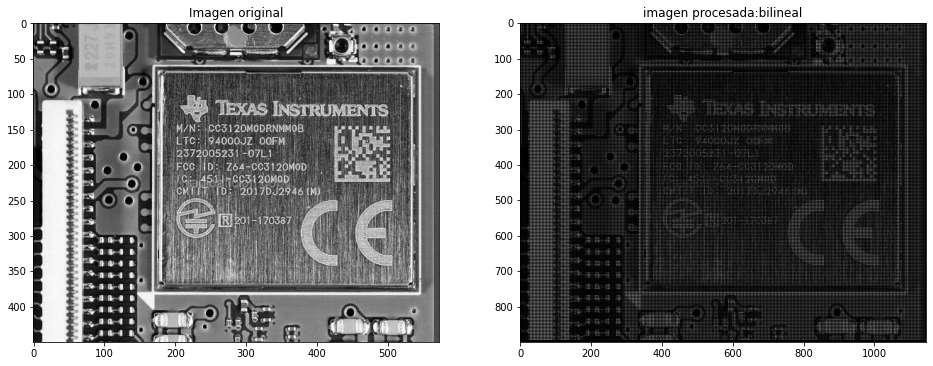

In [27]:
def upscale(img, tipo= "constante"):
  tam= img.shape
  print("upscale(imagen): ", tam)
  
  ajustex=tam[0]%2
  ajustey=tam[1]%2
  lienzox=tam[0]*2
  lienzoy=tam[1]*2
  #defino lienzo en blanco cuyo tamaño es la el doble que el de la imagen.
  lienzo=np.zeros((lienzox,lienzoy),dtype=img.dtype)
  print("Lienzo: ", lienzo.shape)

  if tipo=='constante':
    kernel=0.25* np.array([[1,1],
                      [1,1]])
    kx=kernel.shape[0] #ancho del kernel
    ky=kernel.shape[0] #alto del kernel

    for i in range(0,tam[0]-kx, kx):
      for j in range(0,tam[1]-ky, ky):
#       el escalado es simplemente copiar en el lienzo
#        1 pixel de cada 2 pixels de la imagen original
        lienzo[i*2,j*2]=img[i,j]
        lienzo[i*2+1,j*2]=img[i,j]
        lienzo[i*2,j*2+1]=img[i,j]
        lienzo[i*2+1,j*2+1]=img[i,j]

  elif tipo=='bilineal':
      #se puede hacer sin el kernel y ventana, pero lo dejo así por legibilidad
      kernel=np.array([[1,1],
                        [1,1]])
      kx=kernel.shape[0] #ancho del kernel
      ky=kernel.shape[0] #alto del kernel
      print("kx,ky: ",kx,ky)
      for i in range(0,tam[0]-kx, kx):
        for j in range(0,tam[1]-ky, ky):
          lienzo[i*2,j*2]=img[i,j]
          lienzo[i*2+1,j*2]=(img[i,j]+img[i+1,j])//2 #promedio de la fila
          lienzo[i*2,j*2+1]=(img[i,j]+img[i,j+1])//2 #promedio de la columna
          
          #ven= img[i:i+kx,j:j+ky]
          lienzo[i*2+1,j*2+1]=img[i+1,j+1]
          #lienzo[i+1,j+1]= 0.25* np.sum(ven) #promedio de la ventana
          #obs: no me convence usar el promedio de la ventnaa para para posicion [i+1,j+1]
          #este pixel siempre quedará un poco mas oscuro que el resto
  elif tipo=='bicubica':
    print("en progreso")
  
  return lienzo


tipo = "bilineal" #@param [ 'constante', 'lineal', 'bilineal','promedio']
res=upscale(img, tipo)  

fig, axs = plt.subplots(1, 2, tight_layout=False,figsize=(16,16))
axs[0].imshow(img.astype('uint8'),cmap= 'gray')
axs[0].set_title("Imagen original")
axs[1].imshow( res.astype('uint8'),cmap='gray')
axs[1].set_title("imagen procesada:%s" % str(tipo))
plt.show()

#genero archivo para poder reutilizarlo luego
archi='last'
img.imwrite(f"{path}{archi}.{ext}",res.astype('uint8'), format="PNG-PIL")



Cuantización


leyendo archivo: ./cursoPDI2021/imagenes/plantaciones1.png (412, 506, 3)
Archivo, dimension:  plantaciones1 (412, 506, 3)
valor máximo:  235.126


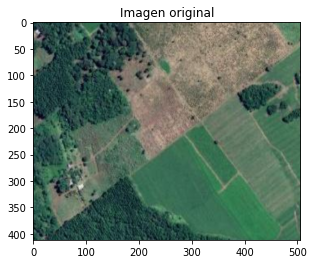

In [88]:
import imageio as img

path="./cursoPDI2021/imagenes/"
ext="png"

#Procurar buscar imágenes que tengan el mismo tamaño
archi = "plantaciones1" #@param [ 'last','Philips_PM5544.svg320','Philips_PM5544.svg640', '320px-RCA_Indian_Head_Test_Pattern.svg320', '640px-RCA_Indian_Head_Test_Pattern.svg','chip1r','chip2','chip3-gray', 'plantaciones1', 'mac_atrofica','mac_subatr']

imagen=leerIMG(archi)

print("Archivo, dimension: ", archi, imagen.shape)

if (len(imagen.shape) >2):
  #la imagen tiene mas de 1 canal.
  #img2=imagen.astype('float')//255 #normalizo
  #img3=np.clip(img2,0.,1.)  #recorto los valores extremos al rango [0:1] 

  imagen_yiq=RGB_TO_YIQ(imagen)
  #print("Canales: ", imagen_yiq.shape)
  img=imagen_yiq[:,:,0]

else:
  #tiene un sólo canal
  img=imagen

print("valor máximo: ",np.max(img))
plt.title("Imagen original")
plt.imshow( imagen.astype('uint8') )



niveles: se usa para cuantificar los niveles en la cuantización uniforme


decimales: se usa para limitar el error en el algoritmos "difusion del error"

limites:  1.0 235.0
Lienzo:  (412, 506)


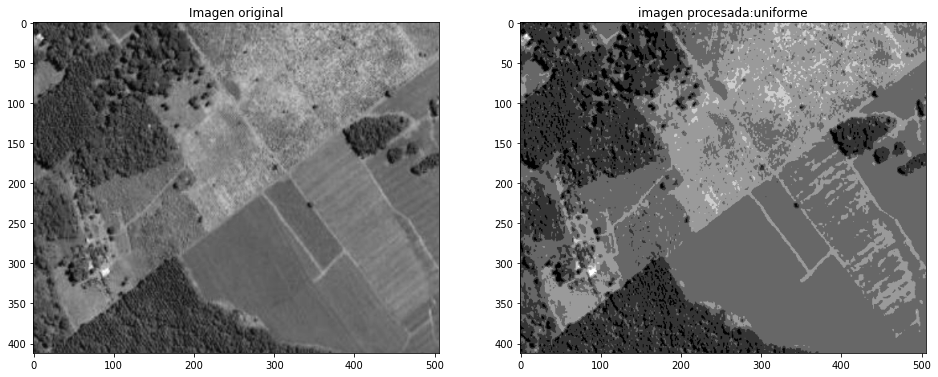

In [101]:
def upscale(img, tipo= "constante"):
  tam= img.shape
  print("upscale(imagen): ", tam)
  
  ajustex=tam[0]%2
  ajustey=tam[1]%2
  lienzox=tam[0]*2
  lienzoy=tam[1]*2
  #defino lienzo en blanco cuyo tamaño es la el doble que el de la imagen.
  lienzo=np.zeros((lienzox,lienzoy),dtype=img.dtype)
  print("Lienzo: ", lienzo.shape)

  if tipo=='constante':
    kernel=0.25* np.array([[1,1],
                      [1,1]])
    kx=kernel.shape[0] #ancho del kernel
    ky=kernel.shape[0] #alto del kernel

    for i in range(0,tam[0]-kx, kx):
      for j in range(0,tam[1]-ky, ky):
#       el escalado es simplemente copiar en el lienzo
#        1 pixel de cada 2 pixels de la imagen original
        lienzo[i*2,j*2]=img[i,j]
        lienzo[i*2+1,j*2]=img[i,j]
        lienzo[i*2,j*2+1]=img[i,j]
        lienzo[i*2+1,j*2+1]=img[i,j]

  elif tipo=='bilineal':
      #se puede hacer sin el kernel y ventana, pero lo dejo así por legibilidad
      kernel=np.array([[1,1],
                        [1,1]])
      kx=kernel.shape[0] #ancho del kernel
      ky=kernel.shape[0] #alto del kernel
      print("kx,ky: ",kx,ky)
      for i in range(0,tam[0]-kx, kx):
        for j in range(0,tam[1]-ky, ky):
          lienzo[i*2,j*2]=img[i,j]
          lienzo[i*2+1,j*2]=(img[i,j]+img[i+1,j])//2 #promedio de la fila
          lienzo[i*2,j*2+1]=(img[i,j]+img[i,j+1])//2 #promedio de la columna
          
          #ven= img[i:i+kx,j:j+ky]
          lienzo[i*2+1,j*2+1]=img[i+1,j+1]
          #lienzo[i+1,j+1]= 0.25* np.sum(ven) #promedio de la ventana
          #obs: no me convence usar el promedio de la ventnaa para para posicion [i+1,j+1]
          #este pixel siempre quedará un poco mas oscuro que el resto
  elif tipo=='bicubica':
    print("en progreso")
  
  return lienzo


#uniforme()
#cuantiza la imagen "img" en los niveles indicados como argumento
def uniforme(img, niveles):
  tam= img.shape
  sup=np.floor(np.max(img))
  inf=np.floor(np.min(img))
  print ("limites: ", inf,sup)
  hist=np.linspace(inf,sup, niveles+1)
  #print("niveles:", hist)
  lienzo=np.zeros((tam[0],tam[1]),dtype=img.dtype)
  print("Lienzo: ", lienzo.shape)

  ultimobin=len(hist)
  for k in range (0, ultimobin-1):
    for i in range(0,tam[0]):
      for j in range(0,tam[1]):
#        #no necesito hacer esto porque el lienzo ya s eencuentra inicializado en cero
#        if k==0:
#          img[i,j]< hist[k]:
#            lienzo[i,j]=0
        if img[i,j]>= hist[k] and img[i,j]< hist[k+1]:
          lienzo[i,j]=hist[k];
          continue
        if (img[i,j]>= hist[k]) and (k==ultimobin):
          lienzo[i,j]=hist[k+1];

  return lienzo

#difusionerror()
#cuantiza la imagen "img" utilizando un escaneo x linea y limitando el error
# el error es redondeado por el argumento "decimales"
#el resultado cambia mucho si se cambia el signo del error en la formula, de (+) -> (-)
def difusionerror(img, decimales):
  tam= img.shape
  sup=np.max(img)
  inf=np.min(img)
  print ("limites: ", inf,sup)
  lienzo=np.zeros((tam[0],tam[1]),dtype=img.dtype)
  print("Lienzo: ", lienzo.shape)

  for i in range(0,tam[0]):
    #reinicio el error x fila
    error=0.0
    for j in range(0,tam[1]):
      lienzo[i,j]= np.round( img[i,j]+error,decimales)
      error=error + lienzo[i,j]- img[i,j]
      #print("error:", error)
  return lienzo

#dithering_rand()
#cuantiza la imagen "img" utilizando un pixel x pixel
#se compara el valor de cada pixel con un valor aleatorio y si es mayor, se enciende el pixel en destino
def dithering_rand(img):
  from numpy.random import default_rng
  rng = default_rng()
  tam= img.shape
  sup=np.max(img)
  inf=np.min(img)
  print ("limites: ", inf,sup)
  lienzo=np.zeros((tam[0],tam[1]),dtype=img.dtype)
  print("Lienzo: ", lienzo.shape)
  #rnd=rng.integers(inf,sup,1)
  for i in range(0,tam[0]):
    
    for j in range(0,tam[1]):
      #se compara el valor del pixel con un número aleatorio
      #cuyos valores pueden encontrarse entre los límites inf y sup
      rnd=rng.integers(inf,sup,1)
      if img[i,j]>= rnd:
        lienzo[i,j]= sup
  return lienzo








qtipo = "uniforme" #@param [ 'uniforme', 'dithering aleatorio', 'difusion del error']
niveles = 6 #@param {type:"slider", min:1, max:256, step:1}
decimales = 3 #@param {type:"slider", min:0, max:4, step:1}


if qtipo=="uniforme": res=uniforme(img, niveles)  
elif qtipo=="difusion del error": res=difusionerror(img,decimales)  
elif qtipo=="dithering aleatorio": res=dithering_rand(img)  

fig, axs = plt.subplots(1, 2, tight_layout=False,figsize=(16,16))
axs[0].imshow(img.astype('uint8'),cmap= 'gray')
axs[0].set_title("Imagen original")
axs[1].imshow( res.astype('uint8'),cmap='gray')
axs[1].set_title("imagen procesada:%s" % str(qtipo))
plt.show()

#genero archivo para poder reutilizarlo luego
#archi='last'
#img.imwrite(f"{path}{archi}.{ext}",res.astype('uint8'), format="PNG-PIL")



In [80]:
from numpy.random import default_rng
rng = default_rng()
#vals = rng.standard_normal(10)
#more_vals = rng.standard_normal(10)
#print (vals)
#print(more_vals)
print(rng.integers(0,255,1))

[238]
